In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
semana = 52

In [3]:
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override()

Research Objectives:

Compare the marginal risk adjusted return contribution provided by the addition of EM Debt to a portfolio.

To create a basic framework to analyze and compare portfolios with N assets

To create useful visualizations and simulations

Dataset:
Source: Yahoo Finance

Assets:

SPY : SPDR S&P 500 ETF

QQQ : PowerShares QQQ ETF

AGG : iShares Core US Aggregate Bond ETF

GLD : SPDR Gold Shares

EMB : iShares JP Morgan USD Em Mkts Bd ETF

Period:

Start: 4/29/2013
End: 4/30/2018
Periodicity: Weekly
Data points: 262

In [4]:
data = pd.read_excel('MasterAllocation.xlsx', sheet_name='Summary',index_col='Date')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


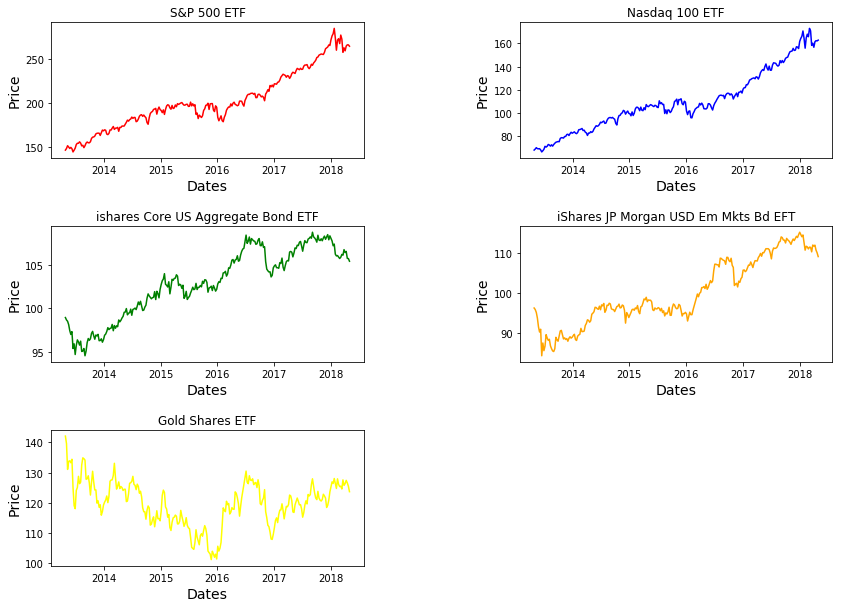

In [6]:
fig1 = plt.figure(figsize=(14, 10))
plt.subplots_adjust(hspace=.5, wspace=.5)  # it adds space in between plots
plt.subplot(323)
ax = plt.gca()
ax.plot(data['AGG'], color='green')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('ishares Core US Aggregate Bond ETF')

plt.subplot(321)
ax = plt.gca()
ax.plot(data['SPY'], color='red')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('S&P 500 ETF')

plt.subplot(322)
ax = plt.gca()
ax.plot(data['QQQ'], color='blue')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Nasdaq 100 ETF')

plt.subplot(324)
ax = plt.gca()
ax.plot(data['EMB'], color='orange')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('iShares JP Morgan USD Em Mkts Bd EFT')

plt.subplot(325)
ax = plt.gca()
ax.plot(data['GLD'], color='yellow')
ax.set_xlabel('Dates', fontsize=14)
ax.set_ylabel('Price', fontsize=14)
ax.set_title('Gold Shares ETF')

plt.show()

In [7]:
normalized_series = (data/data.iloc[0])

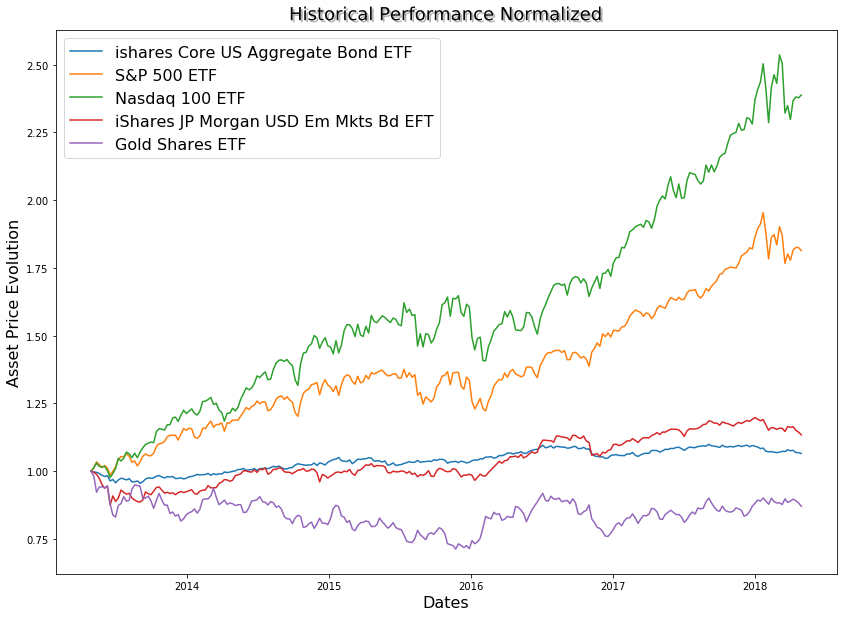

In [8]:
from matplotlib import patheffects
fig2 = plt.figure(figsize = (14,10))
plt.plot(normalized_series)

title_text_obj = plt.title("Historical Performance Normalized", fontsize = 18,
                          verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)

plt.legend(('ishares Core US Aggregate Bond ETF','S&P 500 ETF','Nasdaq 100 ETF','iShares JP Morgan USD Em Mkts Bd EFT','Gold Shares ETF'),fontsize = 16)
plt.show()

In [9]:
data_returns = np.log(data/data.shift(1))
data_returns.dropna(inplace=True)

In [12]:
data_returns.head()

,AGG,SPY,QQQ,EMB,GLD
Date,,,,,
2013-05-06,-0.002793,0.012563,0.012813,-0.003885,-0.017679
2013-05-13,-0.001540,0.021372,0.016967,-0.007664,-0.063050
2013-05-20,-0.003906,-0.009812,-0.012051,-0.014997,0.020316
2013-05-27,-0.007032,-0.011315,-0.002182,-0.023796,0.001195
2013-06-03,-0.004593,0.008226,0.001910,-0.014448,-0.004790


In [10]:
stats = pd.DataFrame()
stats['Annualized Returns(%)'] = data_returns.mean()*semana*100
stats['Annualized Volatility(%)'] = data_returns.std()*np.sqrt(semana)*100
stats['Sharpe Ratio'] = stats['Annualized Returns(%)'] / stats['Annualized Volatility(%)']

In [11]:
print(82*'-')
print('Assets Classes Annualized Statistics - full observation period')
stats.style.bar(color=['red','green'], align='zero')

----------------------------------------------------------------------------------
Assets Classes Annualized Statistics - full observation period


,Annualized Returns(%),Annualized Volatility(%),Sharpe Ratio
AGG,1.26322,3.6003,0.350866
SPY,11.87,11.6772,1.01652
QQQ,17.3423,14.7211,1.17806
EMB,2.50941,8.00947,0.313306
GLD,-2.7598,14.8089,-0.18636


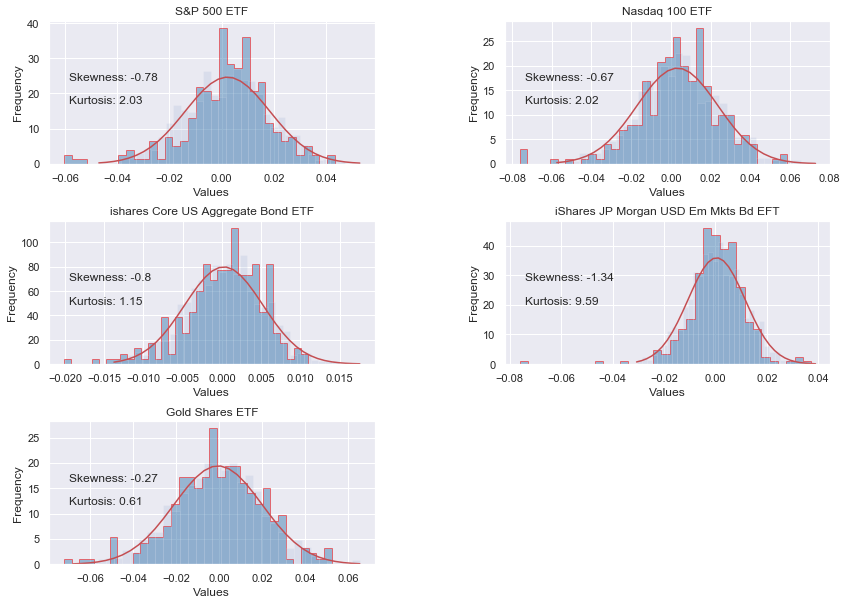

In [14]:
datos_returns = data_returns.copy()

binsnumber = 35

fig3, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(323)
ax = plt.gca()

ax.hist(datos_returns['AGG'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['AGG'].std(),datos_returns['AGG'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['AGG'].skew(),2),round(datos_returns['AGG'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('ishares Core US Aggregate Bond ETF')

plt.subplot(321)
ax1 = plt.gca()
ax1.hist(datos_returns['SPY'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['SPY'].std(),datos_returns['SPY'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['SPY'].skew(),2),round(datos_returns['SPY'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('S&P 500 ETF')

plt.subplot(322)
ax = plt.gca()
ax.hist(datos_returns['QQQ'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['QQQ'].std(),datos_returns['QQQ'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['QQQ'].skew(),2),round(datos_returns['QQQ'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Nasdaq 100 ETF')

plt.subplot(324)
ax = plt.gca()
ax.hist(datos_returns['EMB'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['EMB'].std(),datos_returns['EMB'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['EMB'].skew(),2),round(datos_returns['EMB'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('iShares JP Morgan USD Em Mkts Bd EFT')

plt.subplot(325)
ax = plt.gca()
ax.hist(datos_returns['GLD'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = datos_returns['GLD'].std(),datos_returns['GLD'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')
ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(datos_returns['GLD'].skew(),2),round(datos_returns['GLD'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,60),fontsize=12)


ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Gold Shares ETF')

plt.show();


U.S. Investment grade Bonds versus EM Government Bonds


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


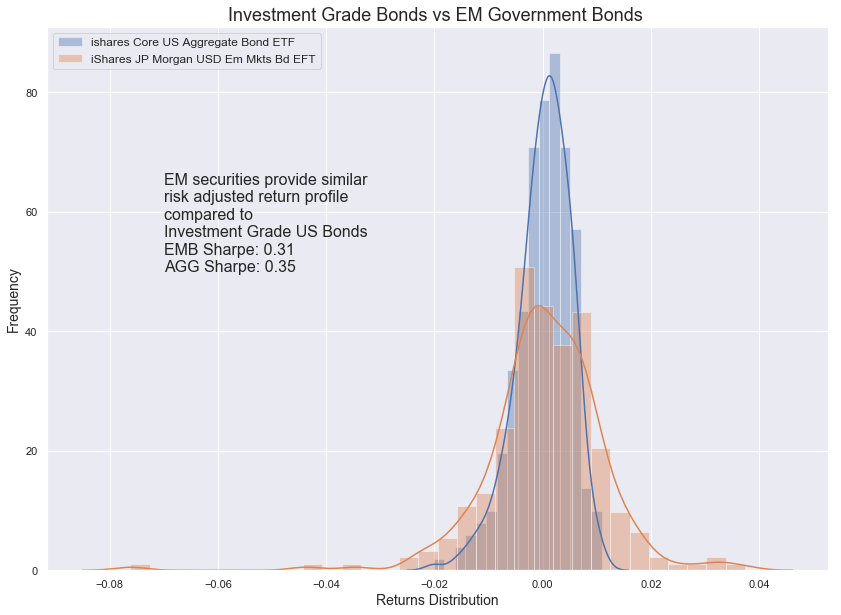

In [15]:
fig4 = plt.figure(figsize=(14,10))
sns.distplot(datos_returns['AGG'])
sns.distplot(datos_returns['EMB'])
plt.legend(('ishares Core US Aggregate Bond ETF','iShares JP Morgan USD Em Mkts Bd EFT'),fontsize = 12)

# anotate an important value
plt.annotate('EM securities provide similar\nrisk adjusted return profile\ncompared to \nInvestment Grade US Bonds\nEMB Sharpe: {}\nAGG Sharpe: {}'.format(round(stats.loc['EMB','Sharpe Ratio'],2),round(stats.loc['AGG','Sharpe Ratio'],2)),
             xy=(-.01,40),xycoords = 'data',xytext =(-.07, 50),fontsize=16)
plt.title('Investment Grade Bonds vs EM Government Bonds ',fontsize=18)
plt.xlabel('Returns Distribution', fontsize= 14)
plt.ylabel('Frequency',fontsize=14)
plt.show();

### Simulation

Initial Portfolio Allocation:

US Investment Grade Fixed Income: 30%
US Equities : 50% (S&P 500 index & Nasdaq 100 index)
Gold: 20%


New Allocation including EM:

US Investment Grade Fixed Income: 30%
US Equities : 50% (S&P 500 index & Nasdaq 100 index)
EM Government Bonds: 20%

In [16]:
allocation = pd.DataFrame(data =[[.30,.30],[.35,.35],[.15,.15],[0,.20],[.20,0]],
                          index=['AGG','SPY','QQQ','EMB','GLD'],
                         columns =['No_EM','EM'])
allocation

,No_EM,EM
AGG,0.30,0.30
SPY,0.35,0.35
QQQ,0.15,0.15
EMB,0.00,0.20
GLD,0.20,0.00


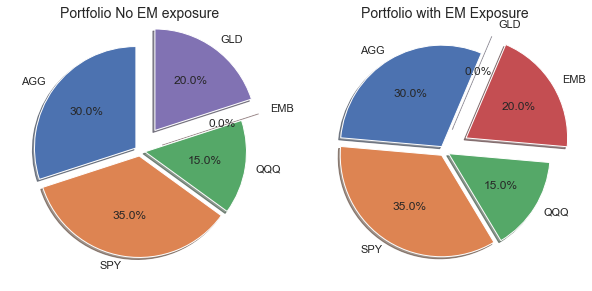

In [18]:
fig5 =plt.figure(figsize=(10,8))
ax = plt.axes([0.1, 0.1, 0.8, 0.8])
explode = [.05,.05,.05,.25,.25]

labels = ['AGG','SPY','QQQ','EMB','GLD']

plt.subplot(121)
plt.pie(allocation['No_EM'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 90,shadow=True)
plt.title('Portfolio No EM exposure',fontsize =14)

plt.subplot(122)
plt.pie(allocation['EM'], explode = explode, labels= labels,
       autopct= '%1.1f%%', startangle = 67, shadow= True)
plt.title('Portfolio with EM Exposure',fontsize =14)

plt.show();

In [19]:
normalized_series1 = normalized_series.copy()

In [20]:
normalized_series1['EM'] = normalized_series[['AGG','SPY','QQQ','EMB','GLD']].mul(allocation.EM.values,axis=1).sum(axis=1)
normalized_series1['no_EM'] = normalized_series.mul(allocation['No_EM'].values,axis=1).sum(axis=1)

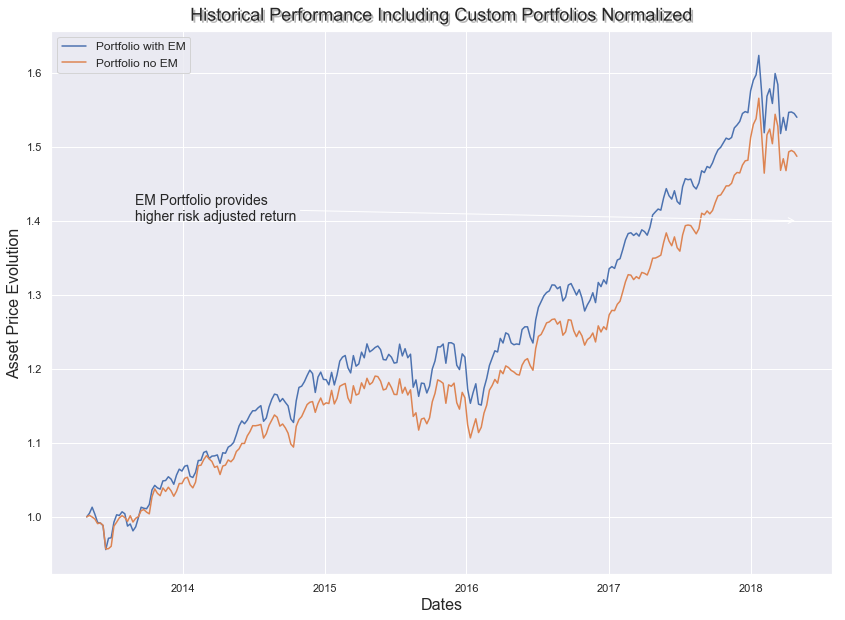

In [21]:
from matplotlib import patheffects
fig6 =plt.figure(figsize=(14,10))
ax = plt.gca()
ax.plot(normalized_series1[['EM','no_EM']])

title_text_obj = plt.title("Historical Performance Including Custom Portfolios Normalized", fontsize = 18,
                          verticalalignment = 'bottom')
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
pe = patheffects.withSimplePatchShadow(offset = (1, -1), shadow_rgbFace = (1,0,0),
                                      alpha = 0.8)
xlabel_obj = plt.xlabel('Dates', fontsize = 16)
ylabel_obj = plt.ylabel('Asset Price Evolution', fontsize = 16)
#('AGG','SPY','QQQ','EMB','GLD')
ax.legend(('Portfolio with EM', 'Portfolio no EM'),fontsize = 12)
ax.annotate('EM Portfolio provides \nhigher risk adjusted return',('2018-04-30',1.4),xycoords = 'data',xytext =('2013-08-30',1.4),arrowprops =dict(arrowstyle ='->'),fontsize=14)
plt.show()

In [22]:
datos_returns.corr('pearson')

,AGG,SPY,QQQ,EMB,GLD
AGG,1.000000,-0.111919,-0.063819,0.574893,0.418678
SPY,-0.111919,1.000000,0.905131,0.384069,-0.167545
QQQ,-0.063819,0.905131,1.000000,0.337579,-0.147379
EMB,0.574893,0.384069,0.337579,1.000000,0.244306
GLD,0.418678,-0.167545,-0.147379,0.244306,1.000000


In [23]:
Expected_Return_noEM = np.sum(datos_returns.mean()* allocation.No_EM)* semana

In [25]:
Expected_Std_noEM = np.sqrt(np.dot(allocation.No_EM.T,np.dot(datos_returns.cov()*semana,
                                                             allocation.No_EM)))

In [26]:
Sharpe_noEM = Expected_Return_noEM / Expected_Std_noEM

In [27]:
Expected_Return_EM = np.sum(datos_returns.mean()* allocation.EM)* semana

In [28]:
Expected_Std_EM = np.sqrt(np.dot(allocation.EM.T,np.dot(datos_returns.cov()*semana,
                                                             allocation.EM)))

In [29]:
Sharpe_EM = Expected_Return_EM / Expected_Std_EM

In [30]:
print('Key Stats: Portfolio with no EM Securities ')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_noEM))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_noEM))
print('Sharpe Ratio: {:.4}'.format(Sharpe_noEM))
print(82*'-')
print('Key Stats: Portfolio with EM Securities ')
print(82*'=')
print('Annualized Returns: {:.3%}'.format(Expected_Return_EM))
print('Annualized Volatility: {:.3%}'.format(Expected_Std_EM))
print('Sharpe Ratio: {:.4}'.format(Sharpe_EM))
print(82*'-')

Key Stats: Portfolio with no EM Securities 
Annualized Returns: 6.583%
Annualized Volatility: 6.577%
Sharpe Ratio: 1.001
----------------------------------------------------------------------------------
Key Stats: Portfolio with EM Securities 
Annualized Returns: 7.637%
Annualized Volatility: 7.054%
Sharpe Ratio: 1.083
----------------------------------------------------------------------------------


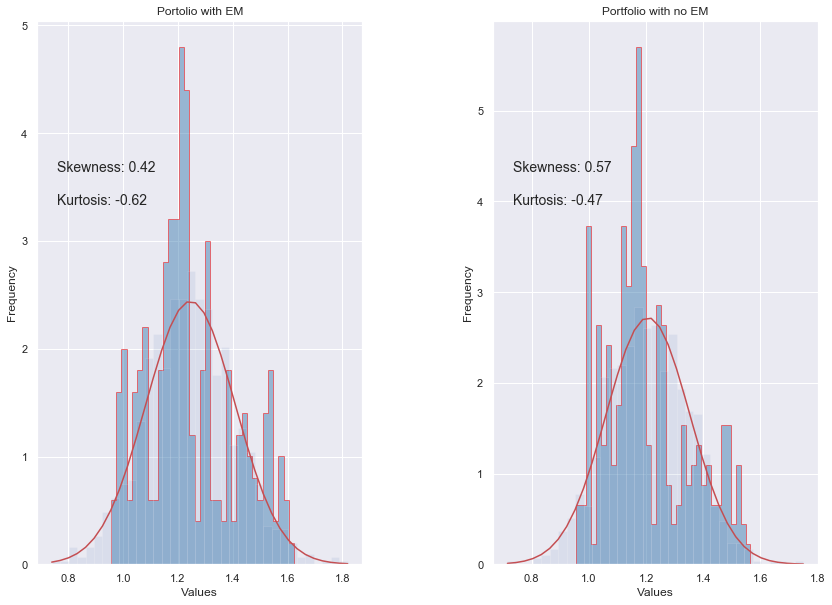

In [31]:
binsnumber = 35

fig7, ax = plt.subplots(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(121)
ax = plt.gca()

ax.hist(normalized_series1['EM'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['EM'].std(),normalized_series1['EM'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['EM'].skew(),2),round(normalized_series1['EM'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)

ax.set_xlabel('Values')
ax.set_ylabel('Frequency')
ax.set_title('Portolio with EM')

plt.subplot(122)
ax1 = plt.gca()
ax1.hist(normalized_series1['no_EM'], bins=binsnumber, color='steelblue', density = True,
       alpha = 0.5, histtype ='stepfilled',edgecolor ='red' )

sigma, mu = normalized_series1['no_EM'].std(),normalized_series1['no_EM'].mean() # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, binsnumber, density=True, alpha = 0.1)
ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=1.5, color='r')

ax1.annotate('Skewness: {}\n\nKurtosis: {}'.format(round(normalized_series1['no_EM'].skew(),2),round(normalized_series1['no_EM'].kurtosis(),2)),
             xy=(10,20),xycoords = 'axes points',xytext =(20,360),fontsize=14)


ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Portfolio with no EM')
plt.show();

Monte Carlo Simulation:

We are getting closer to the end so let us have some fun !!

Let us simulate a The Markowits efficient frontier as well as inefficiently diversified portfolio by running a random simulation over the weights of each asset in both portfolios

In [34]:
pretsEM = []
pvolsEM = []

prets_noEM = []
pvols_noEM = []

#[['AGG','SPY','QQQ','EMB']]
#[['AGG','SPY','QQQ','GLD']]

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    pretsEM.append(np.sum(datos_returns[['AGG','SPY','QQQ','EMB']].mean()* weights)* semana)
    pvolsEM.append(np.sqrt(np.dot(weights.T,np.dot(datos_returns[['AGG','SPY','QQQ','EMB']].cov()*semana,
                                                             weights))))

pretsEM = np.array(pretsEM)
pvolsEM = np.array(pvolsEM)

for p in range(2500):
    weights = np.random.random(len(allocation)-1)
    weights /= np.sum(weights)
    prets_noEM.append(np.sum(datos_returns[['AGG','SPY','QQQ','GLD']].mean()* weights)* semana)
    pvols_noEM.append(np.sqrt(np.dot(weights.T,np.dot(datos_returns[['AGG','SPY','QQQ','GLD']].cov()*semana,
                                                             weights))))
prets_noEM = np.array(prets_noEM)
pvols_noEM = np.array(pvols_noEM)

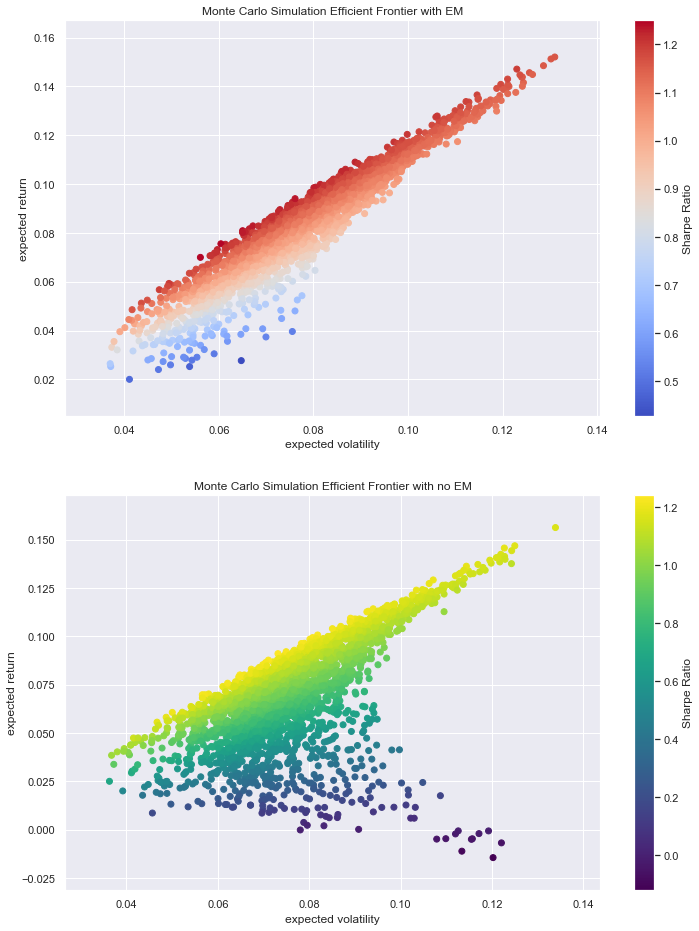

In [35]:
fig8 = plt.figure(figsize = (12,16))
plt.subplots_adjust(wspace=.5)
plt.subplot(211)

plt.scatter(pvolsEM, pretsEM, c = pretsEM / pvolsEM, marker = 'o',cmap='coolwarm')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with EM')

plt.subplot(212)

plt.scatter(pvols_noEM, prets_noEM, c = prets_noEM / pvols_noEM, marker = 'o',cmap='viridis')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe Ratio')
plt.title('Monte Carlo Simulation Efficient Frontier with no EM')

plt.show();

# Return & Volatility going beyond the surfice

We have used so far the returns and Correlation matrix for the whole period.

Using start to end calculations would naturally smooth the results by making the time series less volatile.

Let us calculate again return and volatility for the portfolio, but using 3 months trailing return and correlation.

You will notice that return and volatility mean revert around the historical average, hence, the overall conclusion would not chance if you would use a shorter timeframe to calculate, it would only increase the degree of stochasticity.

In [36]:
def trailing_ret(returns, window, weights, annualization = 52):
    roll_ret = returns.rolling(window=window).mean()
    roll_ret = roll_ret.dropna()
    roll_ret = (roll_ret * weights)*annualization
    roll_ret = roll_ret.sum(axis=1)
    roll_ret = roll_ret.to_frame()
    roll_ret.rename(columns = {0:'returns'},inplace=True)
    return roll_ret

In [39]:
def trailing_cov2(returns, window, weights, annualization=52):
    returns_length = len(returns)
    returns_width = len(returns.columns)
    roll_cov = returns.rolling(window=window).cov()
    #print(roll_cov.shape)
    roll_cov_dates = np.unique(roll_cov.index.get_level_values(0).values)
    roll_cov_dates = roll_cov_dates[window-1:]
    roll_cov = roll_cov.values.reshape(returns_length, returns_width, returns_width)
    roll_cov = roll_cov[window-1:]*annualization
    weights = weights.values.reshape(len(weights),1)
    step1 = np.tensordot(roll_cov,weights,axes=[1,0])
    step2 = np.tensordot(weights,step1, axes=[0,1])
    volatility = np.sqrt(step2)
    volatility = volatility.reshape((returns_length-(window-1)),1)
    
    trailing_vol = pd.DataFrame()
            
    trailing_vol['date'] = roll_cov_dates
    trailing_vol['volatility'] = volatility
    
    trailing_vol.set_index('date',inplace = True)
    
    return trailing_vol

In [40]:
def full_analysis(returns, window, weights, annualization = 52):
    volatility = trailing_cov2(returns=returns, window=window, weights=weights,annualization=annualization)
    returns = trailing_ret(returns=returns, window=window, weights=weights,annualization=annualization)
    fusion=pd.merge(volatility, returns, left_index=True,right_index=True)
    fusion['sharpe']=fusion['returns']/fusion['volatility']
    return fusion

In [42]:
port_matrix = full_analysis(data_returns, 12, allocation.EM)

(1305, 5)


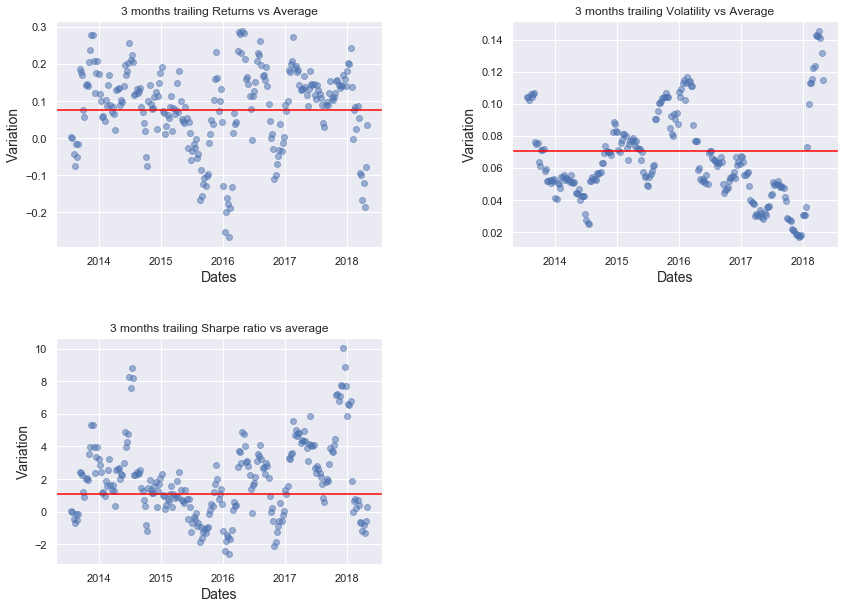

In [43]:
fig9 =plt.figure(figsize=(14,10))
plt.subplots_adjust(hspace=.4,wspace=.4) # it adds space in between plots
plt.subplot(222)
plt.plot(port_matrix.volatility, 'bo',alpha=0.5)
plt.axhline(Expected_Std_EM, color = 'red')
plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Volatility vs Average')

plt.subplot(221)
plt.plot(port_matrix.returns, 'bo',alpha = 0.5)
plt.axhline(Expected_Return_EM,color = 'red')

plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Returns vs Average')

plt.subplot(223)
plt.plot(port_matrix.sharpe, 'bo',alpha = 0.5)
plt.axhline(Sharpe_EM,color = 'red')


plt.xlabel('Dates',fontsize=14)
plt.ylabel('Variation',fontsize=14)
plt.title('3 months trailing Sharpe ratio vs average')

plt.show();